In [3]:
from epidemic_model import Canvas, Bubble, Particle, map_value
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from tqdm import tqdm

In [9]:
def main(restriction=None):
    if restriction == 'lockdown':
        out_time = 22/24
    else:
        out_time = 2/3
    n_bubbles = 12
    canvas = Canvas(height=800, width=800,framerate=60,secs_per_day=12)
    cols = np.floor(math.sqrt(n_bubbles))
    rows = np.floor(n_bubbles/cols)
    particles = []
    bubbles = []
    for i in range(n_bubbles):
        col = i%cols
        row = i//cols
        x = map_value(col, 0, cols-1, 100, canvas.width-100)
        y = map_value(row, 0, rows-1, 100, canvas.height-100)
        bubbles.append(Bubble(x, y, 20, [], False))

    n_particles = canvas.width//10

    for i in range(n_particles):
        bubble = random.choice(bubbles)
        p = Particle(bubble = bubble,
                        x = bubble.x + random.uniform(-10,10),
                        y = bubble.y + random.uniform(-10,10),
                        heading = random.uniform(0, 2*math.pi),
                        speed = random.uniform(1,3),
                        r = 20,
                        canvas=canvas,
                        state = 'S',
                        alpha = 1,
                        gamma = 2)
        particles.append(p)
        bubble.particles.append(p)

    # add an exposed particle
    bubble = bubbles[0]
    p = Particle(bubble = bubble,
                    x = bubble.x + random.uniform(-10,10),
                    y = bubble.y + random.uniform(-10,10),
                    heading = random.uniform(0, 2*math.pi),
                    speed = random.uniform(1,3),
                    r = 20,
                    canvas=canvas,
                    state = 'E',
                    alpha = 1,
                    gamma = 2)
    particles.append(p)
    p0_x = []
    p0_y = []
    epi_curve = []
    n_steps = 5000
    for i in range(n_steps):
        for bubble in bubbles:
            if restriction=='quarantine':
                bubble.quarantine = bubble.check_infection()

        for particle in particles:
            particle.move(bubbles)
            particle.transition_state()
            if particle.state=='I':
                particle.infect_particles(particles)
            
            if canvas.time%canvas.frames_per_day < canvas.frames_per_day*out_time:
                particle.go_home()
            elif particle.bubble.quarantine:
                particle.go_home()
            particle.state_time += 1

        n_infected = len([p for p in particles if p.state == 'I'])
        p0_x.append(particles[-1].x)
        p0_y.append(particles[-1].y)
        epi_curve.append(n_infected)
        canvas.time += 1

    return epi_curve

In [10]:
curves = []
lockdown_curves = []
quarantine_curves = []
for i in tqdm(range(100)):
    curves.append(main(restriction=None))
    lockdown_curves.append(main(restriction='lockdown'))
    quarantine_curves.append(main(restriction='quarantine'))


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [17:03<00:00, 10.24s/it]


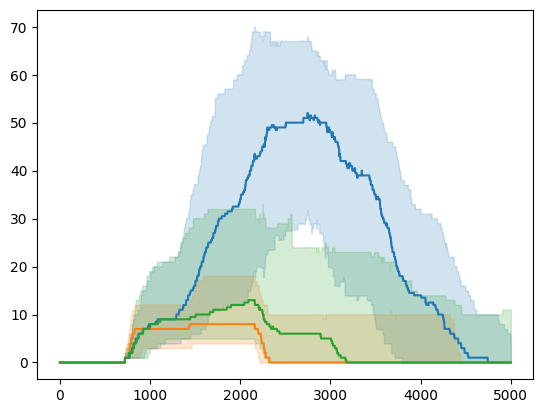

In [12]:
fig, ax = plt.subplots()
t = np.linspace(0, len(curves[0])+1, len(curves[0]))
##
c = curves
ax.plot(np.median(c, axis=0), color='C0')
ax.fill_between(t, np.quantile(c, 0.05, axis=0), np.quantile(c, 0.95, axis=0), alpha=0.2, color='C0')
##
c = lockdown_curves
ax.plot(np.median(c, axis=0), color='C1')
ax.fill_between(t, np.quantile(c, 0.05, axis=0), np.quantile(c, 0.95, axis=0), alpha=0.2, color='C1')
##
c = quarantine_curves
ax.plot(np.median(c, axis=0), color='C2')
ax.fill_between(t, np.quantile(c, 0.05, axis=0), np.quantile(c, 0.95, axis=0), alpha=0.2, color='C2')

In [53]:
len(t)

100

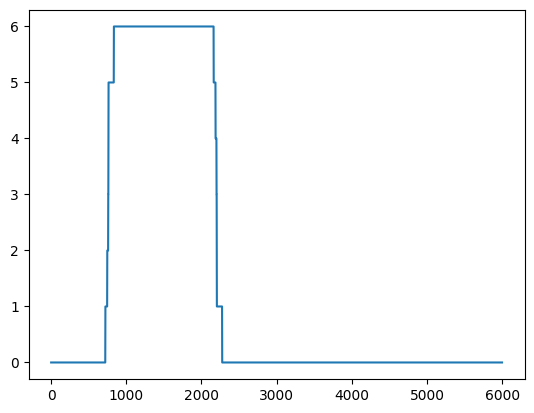

In [47]:
plt.plot(curves[-1])

In [ ]:
np.amin(np.log(draws_2))

-9.6127578262807